In [1]:
'''
from google.colab import drive
drive.mount('/content/drive')
'''

"\nfrom google.colab import drive\ndrive.mount('/content/drive')\n"

# EDA 해야할 리스트 7가지

1. 데이터 이해 -> 홈페이지, 딥터디에 기록함
2. 요약 통계 : dsecribe, boxplot 쓰자
3. 시각화 : 여러개 해보자
4. 상관 관계 탐색 : corrlation 그래프 그려봦
5. 이상치 탐색 : 박스 플롯으로 한 번 확인해보자
6. 결측치 처리 : 이 데이터에는 크게 상관없음
7. 가설 수립 : 다 해보고 결론 내보자

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

df = pd.read_csv('../data/Breast/data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

# 일단 학습 시켜야 하니 object 타입을 바꿔주려 한다.
- 양성 종양은 없음 의미의 0
- 악성 종양은 있음 의미의 1
>> 다음과 같이 설정하겠다.

In [3]:
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B':0})
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


### 캐글에서 제공하는 데이터셋 설명에서 악성 개수가 212개라고 하니 확인차 출력해본다.


## 모두 숫자형태인걸 알 수 있다

>> -> 추가적으로 Unnamed는 과감하게 쓸모 없는 정보니 삭제한다
--> 이유 : 공개의학용 데이터라서 환자 개인정보가 등장할 수 없기 때문 그냥 삭제해도 무방

In [4]:
df.drop('Unnamed: 32' , axis=1 ,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    int64  
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

### 전체가 깔끔하게 정리됐다 이제 시각화를 해보자
--> 사실 그냥 바로 모든 피쳐가지고 모델 돌려도 될 것 같다. 이 데이터 가지고 유의미한 시각화를 할 수 있을지 모르겠다

# 각 열(피쳐)의 데이터 분포를 볼 수 있는 히스토그램을 써봤다

## 의미 : 눈금에 해당하는 데이터 값들의 갯수를 알 수 있다.
- EX) diagnosis 는 0과 1로 이루어져 있으니 0의 개수와 1의 개수 차이를 한눈에 볼 수 있다. 나머지 그래프도 그런식으로 보면 된다.



# 상관관계 시각화를 해보자

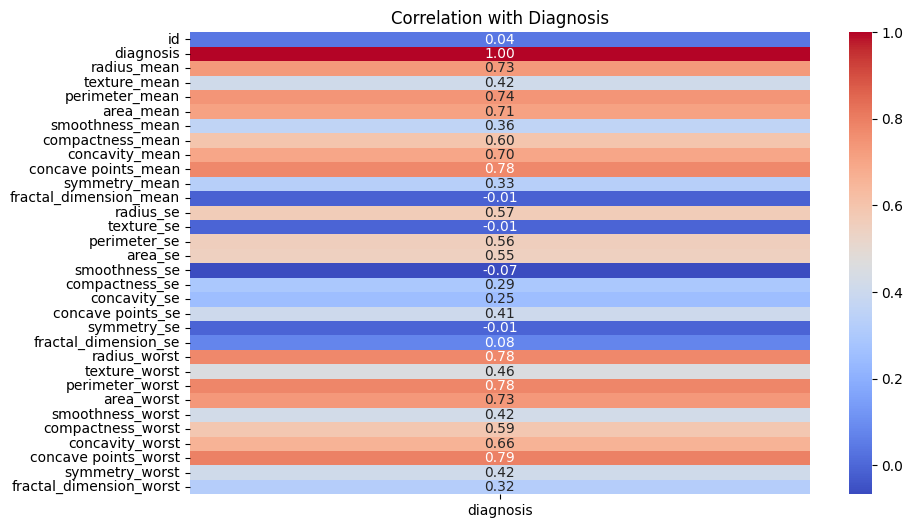

In [5]:
correlation_matrix = df.corr()
# 상관 행렬 계산
diagnosis_correlation = correlation_matrix['diagnosis']
# 'diagnosis' 열과의 상관관계만 선택


# 시각화
plt.figure(figsize=(10, 6))
sns.heatmap(diagnosis_correlation.to_frame(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation with Diagnosis')
plt.show()

In [6]:
print(df['radius_mean'].equals(df['radius_worst']))
# 상관관계상 다르거나 데이터 자체 값도 다른 것을 확인 0.5이하의 값들은 제거

False


In [7]:
df.drop(['id','texture_mean','smoothness_mean','symmetry_mean','fractal_dimension_mean','texture_se','smoothness_se','compactness_se'\
    ,'concavity_se','concave points_se','symmetry_se','fractal_dimension_se','texture_worst','smoothness_worst','symmetry_worst','fractal_dimension_worst'] , axis=1 ,inplace=True)

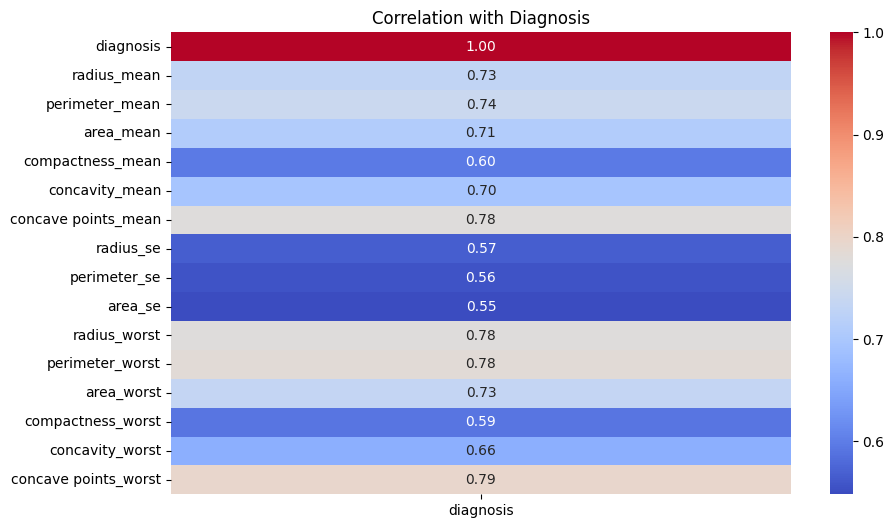

In [8]:
correlation_matrix = df.corr()
# 상관 행렬 계산
diagnosis_correlation = correlation_matrix['diagnosis']
# 'diagnosis' 열과의 상관관계만 선택


# 시각화
plt.figure(figsize=(10, 6))
sns.heatmap(diagnosis_correlation.to_frame(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation with Diagnosis')
plt.show()

- ### 볼 수 있는 것 : SE값은 0에 가까우니 가운데 10개 특성은 보지 않고, 사실상 mean와 worst의 값은 동일하다고 볼 수 있다. 그러니 mean 10개만 확인해보자
- ### smoothness와 texture, symmetrty 제외 나머지 1에 가까움

# 시각화 또 뭐해보지? -> 다른 시각화가 뭐가 있지? -> pairplot이 있다.
    1. 다변량 분석: 여러 변수가 있을때
    2. 변수 간의 패턴 파악
    3. 클래스 구분 --> 이거하려고 써봤다.
    4. 빠른 데이터 탐색
    pairplot은 보통 모든 변수간의 관계를 한번의 시각화 할 때 사용된다.
### 그렇다고 한다.

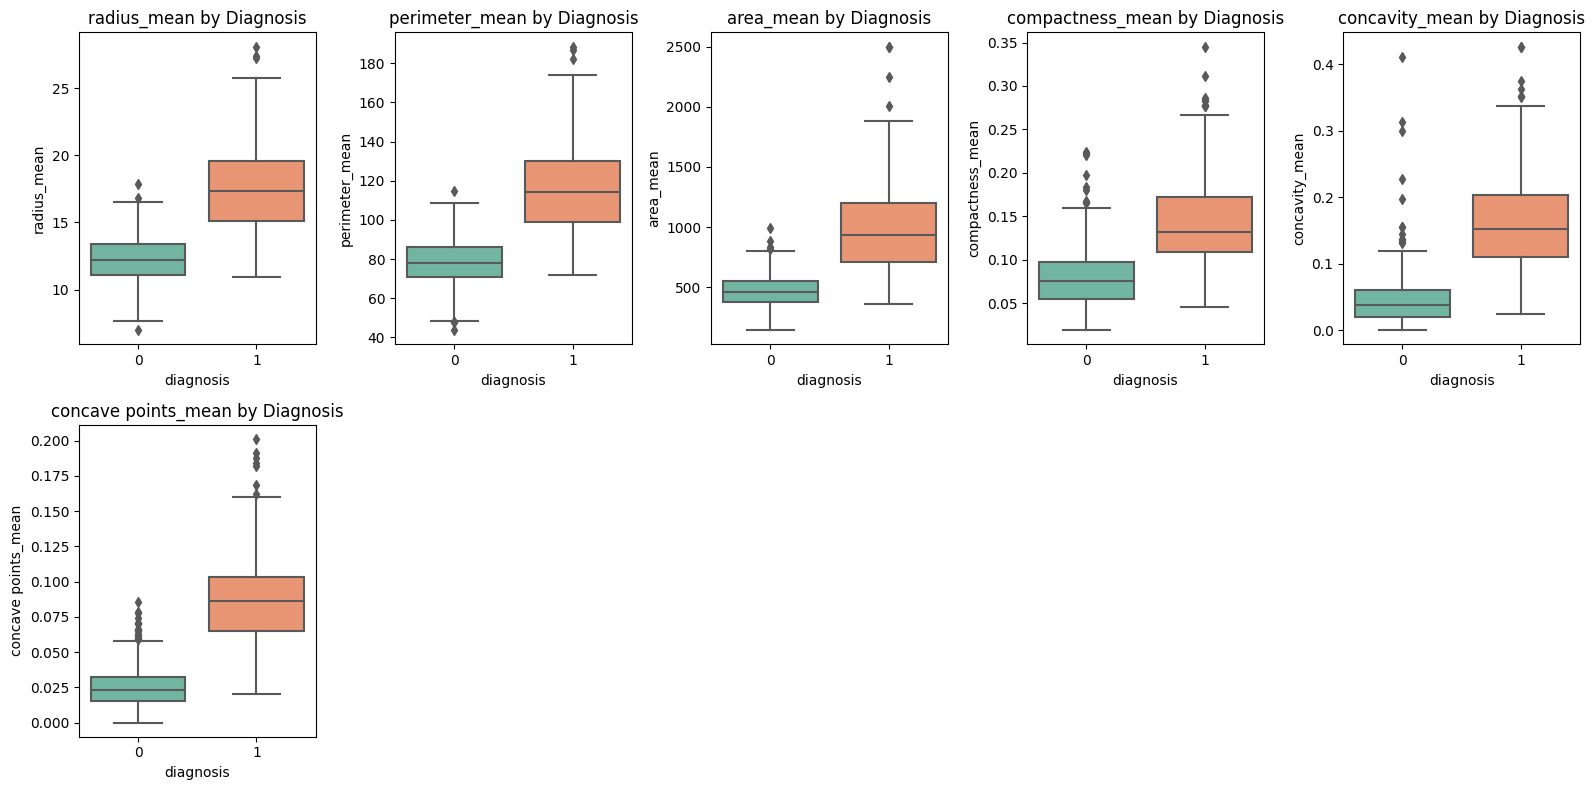

In [9]:
# 'mean'으로 끝나는 특성 선택
mean_columns = df.filter(like='_mean')

# 'diagnosis' 열을 기준으로 여러 특성에 대한 박스플롯 그리기
plt.figure(figsize=(16, 8))
for i, column in enumerate(mean_columns.columns):
    plt.subplot(2, 5, i + 1)
    sns.boxplot(x='diagnosis', y=column, data=df, palette='Set2')
    plt.title(f'{column} by Diagnosis')

plt.tight_layout()
plt.show()

이상치는 확인되나 크게 상관있어 보이지 않는다
학습을 시켜 확인 결과 정균분포도로 확인되어 standardscaler를 활용하였으나 점수 차이는 유의미 하지 않았다.

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,f1_score

상관관계를 기반으로 .5보다 낮은 column들을 삭제해도 결과는 1%미만의 차이가 난다.

In [11]:
# 종속 변수와 독립 변수 분리
X = df.drop(['diagnosis'], axis=1)  # 불필요한 열 제거
y = df['diagnosis']

# 학습 데이터와 테스트 데이터로 나누기
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 결정 트리 모델 생성 및 학습
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# 테스트 데이터에 대한 예측
y_pred = model.predict(X_test)

# 모델 평가
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy:.4f}')
print('\nConfusion Matrix:')
print(conf_matrix)
print('\nClassification Report:')
print(class_report)

Accuracy: 0.9386

Confusion Matrix:
[[69  2]
 [ 5 38]]

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.97      0.95        71
           1       0.95      0.88      0.92        43

    accuracy                           0.94       114
   macro avg       0.94      0.93      0.93       114
weighted avg       0.94      0.94      0.94       114



데이터의 균형도 큰 차이가 없어 샘플링은 필요 없어 보인다.

In [12]:
y.value_counts()

diagnosis
0    357
1    212
Name: count, dtype: int64

In [13]:
from sklearn.preprocessing import StandardScaler,RobustScaler
scaler_stand=StandardScaler()
scaler_robust=RobustScaler()
scaler_stand.fit(df)
scaler_robust.fit(df)
df_stand=pd.DataFrame(scaler_stand.transform(df))
df_robustd=pd.DataFrame(scaler_robust.transform(df))

<Axes: >

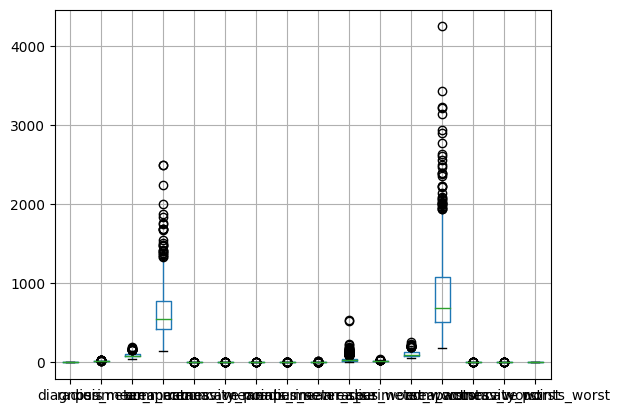

In [14]:
df.boxplot()

<Axes: >

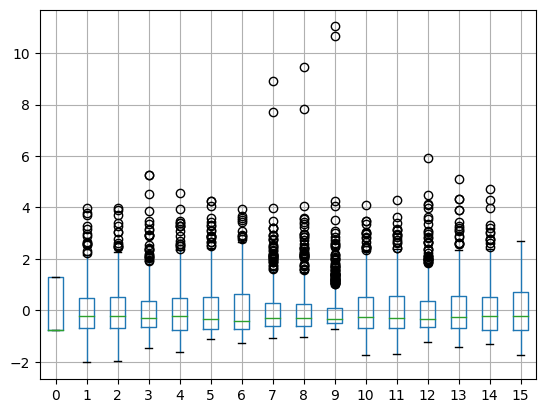

In [15]:
df_stand.boxplot()

<Axes: >

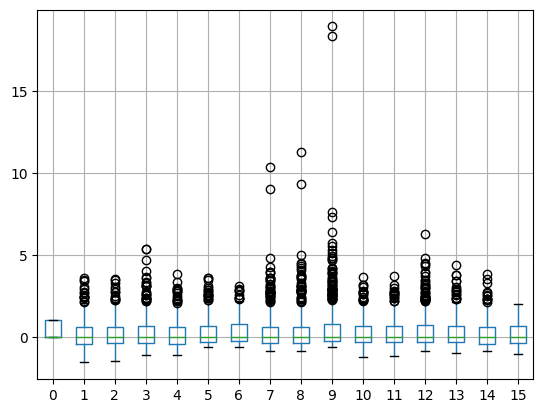

In [16]:
df_robustd.boxplot()

StandardScaler scaling을 통해 데이터의 분산을 줄여 보았으나 결과에선 큰 의미를 발휘하지 못 하였다. RobustScaler 이상치를 잡아주는 scaler종류니 더 잘 잡아주려나...
-> RobustScaler도 큰 효과는 없는 듯하다. boxplot과 실험 결과 모두 성능에 변화는 크지 않았다.

In [17]:
y_df = pd.DataFrame(y)

worst와 mean의 데이터가 비슷할 거라고 생각하였지만 분포 자체가 많이 다르기 때문에 학습을 같이 시켜도 될거라고 판단 하였습니다.

In [ ]:
col

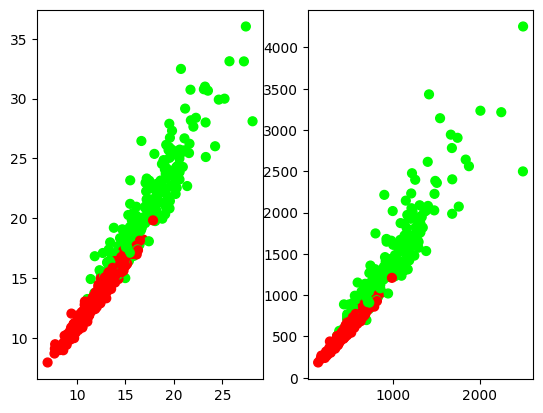

In [18]:
colormap=np.array(['red','lime'])
plt.subplot(1,2,1)
plt.scatter(X.radius_mean, X.radius_worst, c=colormap[y_df.diagnosis],s=40)
plt.subplot(1,2,2)
plt.scatter(X.area_mean, X.area_worst, c=colormap[y_df.diagnosis],s=40)

R-squared -> 데이터의 설명력

Coef -> 데이터의 상관관계

p > |z| ->

해당 요약본에서 더 많은 정보를 얻을 수 있으니 해석하는 방법을 익히는 것도 좋을 듯하다

In [19]:
import statsmodels.api as sm 
model=sm.Logit(y_train.astype(float),X_train.astype(float))
result=model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.088103
         Iterations 12
                             Results: Logit
Model:                 Logit              Method:             MLE        
Dependent Variable:    diagnosis          Pseudo R-squared:   0.866      
Date:                  2023-11-19 17:57   AIC:                110.1741   
No. Observations:      455                BIC:                171.9786   
Df Model:              14                 Log-Likelihood:     -40.087    
Df Residuals:          440                LL-Null:            -300.17    
Converged:             1.0000             LLR p-value:        4.9132e-102
No. Iterations:        12.0000            Scale:              1.0000     
-------------------------------------------------------------------------
                       Coef.   Std.Err.    z    P>|z|    [0.025   0.975] 
-------------------------------------------------------------------------
radius_mean           -13.3913   6.6752

In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.model_selection import cross_validate
import warnings
warnings.simplefilter("ignore")

randomforest

In [21]:
pipe=Pipeline([ 
    ('scaler',RobustScaler()),
    ('clf', RandomForestClassifier(random_state=2023))
])
params={
    'clf__max_depth': list(range(3,6)),
    'clf__n_estimators': list(range(10,110,10))
}
grid=GridSearchCV(pipe, params, scoring='accuracy', cv=3)
grid.fit(X_train,y_train)
print(grid.best_params_)
print(grid.best_score_)

{'clf__max_depth': 3, 'clf__n_estimators': 30}
0.9406587661205995


0.9758241758241758
0.956140350877193


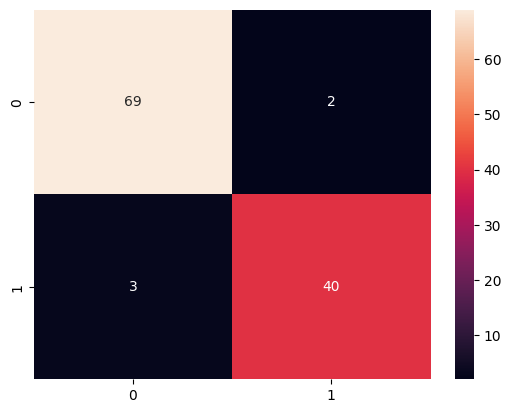

In [22]:
ran = RandomForestClassifier(n_estimators=30, max_depth=3, random_state=2023)
ran.fit(X_train,y_train)
# print(clf.feature_importances_, '\n')
ran.fit(X_train, y_train)
score_tr = ran.score(X_train,y_train)
score_te = ran.score(X_test,y_test)
cm = confusion_matrix(y_test,ran.predict(X_test))
sns.heatmap(cm,annot=True,fmt="d")
print(score_tr)
print(score_te)

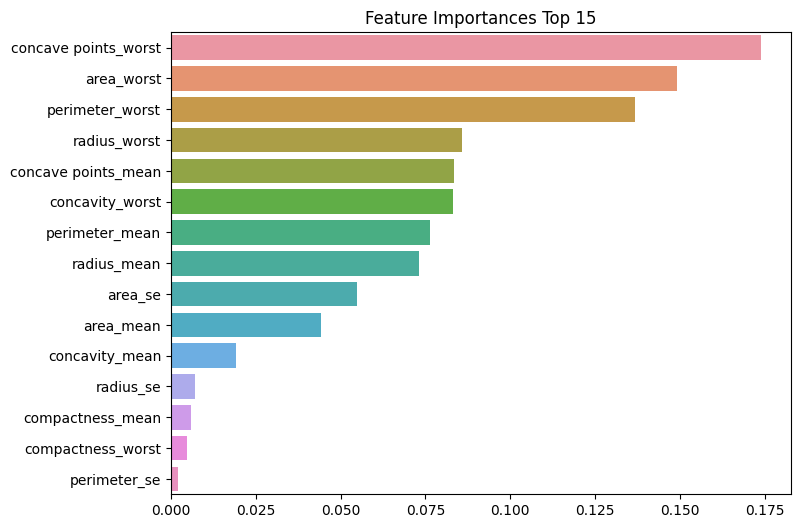

In [23]:
# 시리즈로 만들어 인덱스를 붙인다
ser = pd.Series(ran.feature_importances_, index=X_train.columns)

# 내림차순 정렬을 이용한다, 중요도 탑 15개 출력
top15 = ser.sort_values(ascending=False)[:15]
plt.figure(figsize=(8,6))
plt.title('Feature Importances Top 15')
sns.barplot(x=top15, y=top15.index)
plt.show()

KNN

In [24]:
from sklearn.neighbors import KNeighborsClassifier
pipe=Pipeline([ 
    ('scaler',StandardScaler()),
    ('clf', KNeighborsClassifier())
])
params={
    'clf__n_neighbors': list(range(1,11))
}
grid=GridSearchCV(pipe, params, scoring='accuracy', cv=3)
grid.fit(X_train,y_train)
print(grid.best_params_)
print(grid.best_score_)

{'clf__n_neighbors': 4}
0.9274718252585105


0.9384615384615385
0.9385964912280702


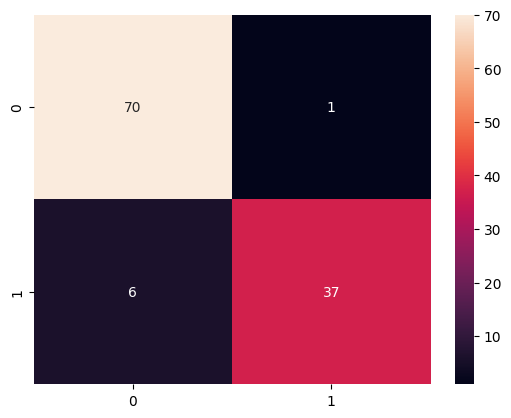

In [25]:
knn=KNeighborsClassifier(n_neighbors=4)
knn.fit(X_train, y_train)
score_tr = knn.score(X_train,y_train)
score_te = knn.score(X_test,y_test)
cm = confusion_matrix(y_test,knn.predict(X_test))
sns.heatmap(cm,annot=True,fmt="d")
print(score_tr)
print(score_te)

SVC -> SVM의 classfication

In [26]:
from sklearn.svm import SVC
pipe=Pipeline([ 
    ('scaler',StandardScaler()),#스케일링시 75%, 없을때 68%
    ('clf', SVC(random_state=2023))
])
params={
    'clf__C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'clf__gamma': [0.0001, 0.001, 0.01, 0.1]
}
grid=GridSearchCV(pipe, params, scoring='accuracy', cv=3)
grid.fit(X_train,y_train)
print(grid.best_params_)
print(grid.best_score_)

{'clf__C': 10, 'clf__gamma': 0.1}
0.956009643313582


0.9692307692307692
0.956140350877193


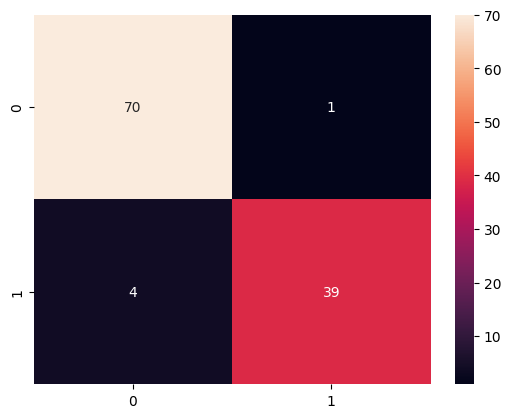

In [27]:
SVC=SVC(C=10, gamma=0.0001,random_state=2023)
SVC.fit(X_train, y_train)
score_tr = SVC.score(X_train,y_train)
score_te = SVC.score(X_test,y_test)
cm = confusion_matrix(y_test,SVC.predict(X_test))
sns.heatmap(cm,annot=True,fmt="d")
print(score_tr)
print(score_te)

Clustering

In [28]:
from sklearn.cluster import KMeans 
pipe = Pipeline([
    ('scaler',StandardScaler()),
    ('clf', KMeans(random_state=2023))
])
params = {
    'clf__n_clusters': list(range(1,11))
}
grid=GridSearchCV(pipe, params, scoring='accuracy', cv=3)
grid.fit(X_train,y_train)
print(grid.best_params_)
print(grid.best_score_)

{'clf__n_clusters': 1}
0.6284564889043801


ANN

In [29]:
from sklearn.neural_network import MLPClassifier
pipe=Pipeline([ 
    ('scaler',StandardScaler()),
    ('clf', MLPClassifier(random_state=2023, max_iter=5000))
])
params={
    'clf__hidden_layer_sizes': [(50,),(100,),(50,50),(100,100)],
    'clf__activation': ['tanh','relu'],
    'clf__alpha': [0.001, 0.01, 0.1]
}
grid=GridSearchCV(pipe, params, scoring='accuracy', cv=3)
grid.fit(X_train,y_train)
print(grid.best_params_)
print(grid.best_score_)

{'clf__activation': 'relu', 'clf__alpha': 0.01, 'clf__hidden_layer_sizes': (100,)}
0.960439177413733
